## Viewing Spectral Profiler Data
This assumes you've already worked through the previous notebook for acessing and manipulating Kaguya data. So the first few steps shouldn't be new to you.

In [21]:
import libpyhat as pyhat
from libpyhat.examples import get_path
import plio.io.io_spectral_profiler as isp

In [22]:
profile = isp.Spectral_Profiler(get_path('SP_2C_02_02358_S138_E3586.spc'))
s       = profile.spectra

# Access the REF1 data
Here we're going to grab the REF1 data (Mare-correction) from the first observation (0) and slice off any wavelengths less than 700 and greater than 1600 - all at once!

In [23]:
subs = s[0]['REF1'][700:1600]

#This should show two columns, one with wavelength and the other with REF1 values
print(subs)

704.7     0.0809
710.8     0.0819
716.7     0.0830
722.7     0.0832
728.7     0.0844
           ...  
1563.7    0.1698
1571.7    0.1699
1579.6    0.1716
1587.7    0.1759
1595.7    0.1733
Name: REF1, Length: 122, dtype: float64


We can grab just the wavelength and just the data by doing the following:

In [24]:
#Spectral data
wv = subs.index
#Wavelengths data
data   = subs.values
print('data',data)
print('wavelengths',wv)

data [0.0809 0.0819 0.083  0.0832 0.0844 0.0842 0.0861 0.0858 0.0864 0.0872
 0.0879 0.0883 0.0885 0.0893 0.0895 0.0909 0.0905 0.0912 0.091  0.0923
 0.0919 0.0924 0.0925 0.0932 0.0928 0.097  0.0922 0.0977 0.0934 0.0948
 0.0958 0.0956 0.096  0.0973 0.0977 0.0977 0.0992 0.0996 0.1011 0.1016
 0.1027 0.103  0.1053 0.106  0.1066 0.1074 0.1094 0.1086 0.1132 0.1137
 0.1138 0.1159 0.1163 0.1171 0.1186 0.1191 0.1202 0.1213 0.1234 0.1257
 0.1255 0.1271 0.1286 0.1276 0.1282 0.1286 0.1288 0.1308 0.1304 0.1324
 0.1345 0.135  0.1366 0.1371 0.1365 0.1381 0.1381 0.1396 0.1395 0.1412
 0.1422 0.141  0.1469 0.1453 0.1467 0.1467 0.1488 0.1482 0.1491 0.1519
 0.1533 0.154  0.1548 0.1555 0.1565 0.1574 0.1584 0.1586 0.1601 0.1588
 0.1614 0.1601 0.1623 0.1618 0.163  0.1659 0.1665 0.1645 0.164  0.164
 0.1679 0.1667 0.1673 0.1681 0.1697 0.1692 0.171  0.1698 0.1699 0.1716
 0.1759 0.1733]
wavelengths Float64Index([             704.7,  710.8000000000001,              716.7,
                           722.7,         

## Continuum Correct the Data
Now lets say you want to perform a 'continuum correction' to data within a certain range. We can use the continuum_correction function as part of PyHAT to do so.

In [25]:
#The third, and seemingly foreign, argument is just the nodes
#(wavelength points) between which you want to apply the correction.
#The function call might yell at you (Python 'FutureWarning' error), but this
#is not due to anything you did wrong here!.
x = pyhat.continuum.continuum_correction(data, wv, [704, 1596])

/home/tgabriel/PyHAT/libpyhat/transform/continuum.py:106: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y = np.apply_along_axis(correction, axis, data[nodeidx],
/home/tgabriel/PyHAT/libpyhat/transform/continuum.py:111: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  corrected[corridx] = data[corridx] / y
/home/tgabriel/PyHAT/libpyhat/transform/continuum.py:112: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array

## Visualization: Plotting the Corrected Continuum
It's usually useful to visualize your data at some point, so let's use the spectra plotter in PyHAT to do so.

<AxesSubplot:title={'center':'Continuum correction'}>

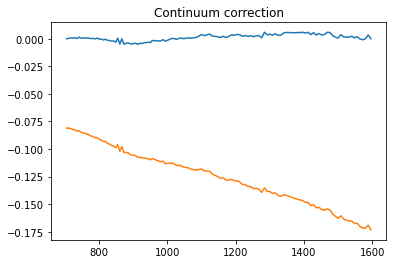

In [27]:
#Plot pre-correction data
subs.plot(title='Continuum correction')

#Perform correction
subs.loc[700:1600] -= x[1]

#Plot post-correction data
subs.plot()


# Transformations: Methods to Alter the Spectrum
!!! The following needs to be updated. Work in progress. !!!

In [28]:
from libpyhat.transform.smooth. import boxcar

ModuleNotFoundError: No module named 'libpyhat.transform.utils'

In [ ]:
subs.plot()

In [ ]:
b = boxcar(a.get[0])
b = b.iloc[1:-1]
b.plot()

## Horgan Analytics 
Here we demonstrate the application of some analysis methods published by Briony Horgan.

In [ ]:
from libpyhat.transform.utils import band_area, band_asymmetry, band_center, band_minima

### Find the band minima between two end members

In [ ]:
center, wv = band_minima(b, 800, 1000)
b.plot()
plot(center, wv, 'r*')

### Fit an nth degree polynomial to band center

In [ ]:
center, center_fit = band_center(b, 800, 1000)
b.plot()
center_fit.plot(linewidth=3)

### Area under 1um

In [ ]:
band_area(b, 750, 1000)